In [1]:
# Import basic libraries... you might need to type 'pip install <library>' in the terminal to install them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the libraries for the machine learning model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # converting target variable
from sklearn.preprocessing import OrdinalEncoder # converting categorical feature variables
from sklearn.naive_bayes import CategoricalNB, GaussianNB # creates the model
from sklearn.metrics import accuracy_score # to compute accuracy score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # confusion matrix as a heatmap
from sklearn.model_selection import cross_val_score # for cross-validation

In [3]:
# display all columns in the dataframe
pd.options.display.max_columns = None

### Loading the dataset

In [4]:
# Load churn dataset
df = pd.read_csv('churn.csv')

print(df.head)

<bound method NDFrame.head of        age gender security_no region_category  membership_category  \
0       18      F     XW0DQ7H         Village  Platinum Membership   
1       32      F     5K0N3X1            City   Premium Membership   
2       44      F     1F2TCL3            Town        No Membership   
3       37      M     VJGJ33N            City        No Membership   
4       31      F     SVZXCWB            City        No Membership   
...    ...    ...         ...             ...                  ...   
36987   46      F     6F51HFO             NaN     Basic Membership   
36988   29      F     21KSM8Y            Town     Basic Membership   
36989   23      F     XK1IM9H             NaN     Basic Membership   
36990   53      M     K6VTP1Z         Village  Platinum Membership   
36991   35      M     LBX0GLR            Town    Silver Membership   

      joining_date joined_through_referral referral_id  \
0       17-08-2017                      No    xxxxxxxx   
1       28-08

## Data Cleaning / Munging / Processing
- formatting issues
- dealing with missing data
- filtering to subset of interest
- handling missing data (do we drop them or imputate (give them another value))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [6]:
# check for missing values
print(df.isnull().sum())

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64


In [7]:
# joining date format is inconsistent e.g. 1/1/2020, 01/01/2020, 1-1-2020
df_clean = df.copy() # make a copy of the original dataframe

# standardize the date format to datetime format
df_clean['joining_date'] = pd.to_datetime(df_clean['joining_date'], errors='coerce', dayfirst=True)
df_clean.head(10)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,NaT,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,NaT,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,NaT,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,6:46:07,23,433.62,13884.77,24,722.27,Yes,No,Yes,Unsolved,No reason specified,0
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10,55.38,8982.50,28,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0
7,42,M,4UJ1551,NaN,No Membership,NaT,?,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19,429.11,44554.82,24,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15,191.07,18362.31,20,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,19:10:16,10,97.31,19244.16,28,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1


In [8]:
# some variables have place holder strings (e.g. '?', 'xxxxxxxx', 'Error', 'None', 'N/A')
placeholders = ['?', 'xxxxxxx', 'Error', 'None']
df_clean.replace(placeholders, pd.NA, inplace=True)
df_clean.head(10)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,<NA>,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,<NA>,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,NaT,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,NaT,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,NaT,No,xxxxxxxx,Gift Vouchers/Coupons,<NA>,Wi-Fi,6:46:07,23,433.62,13884.77,24,722.27,Yes,No,Yes,Unsolved,No reason specified,0
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10,55.38,8982.50,28,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0
7,42,M,4UJ1551,NaN,No Membership,NaT,<NA>,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19,429.11,44554.82,24,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15,191.07,18362.31,20,NaN,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,<NA>,Wi-Fi,19:10:16,10,97.31,19244.16,28,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1


In [9]:
# convert 'avg_frequency_login_days' to numeric
df_clean['avg_frequency_login_days'] = pd.to_numeric(df_clean['avg_frequency_login_days'], errors='coerce')

In [10]:
# We noticed some "joined_through_referral" vaules were NA when it shows a "referral_id"
# for NA values that have a referral_id, we will set "joined_through_referral" to "Yes"
df_clean.loc[
    df_clean['referral_id'].notna() & df_clean['joined_through_referral'].isna(),
    'joined_through_referral'
] = 'Yes'

### Dealing with Negative Values
4 variables with negative numbers that wouldn't make sense
1) days_since_last_login       1999
2) avg_time_spent              1719
3) avg_frequency_login_days     683
4) points_in_wallet             136


In [11]:
# We also found some negative values in some attributes that wouldn't make sense
numeric_cols = df_clean.select_dtypes(include='number').columns
negative_summary = df_clean[numeric_cols].lt(0).sum().sort_values(ascending=False)
negative_summary

days_since_last_login       1999
avg_time_spent              1719
avg_frequency_login_days     683
points_in_wallet             136
age                            0
avg_transaction_value          0
churn_risk_score               0
dtype: int64

In [12]:
# for 'avg_time_spent' we'll fill the negative values with the NAs
df_clean.loc[df_clean['avg_time_spent'] < 0, 'avg_time_spent'] = pd.NA

# check how many negative values we have in 'avg_time_spent'
neg_time_spent = df_clean[df_clean['avg_time_spent'] < 0]
num_negative_time = neg_time_spent.shape[0]
num_negative_time

0

In [13]:
# replace negative values with NaN for the other columns
for col in ['days_since_last_login', 'avg_frequency_login_days', 'points_in_wallet']:
    df_clean.loc[df_clean[col] < 0, col] = np.nan

In [14]:
# select numeric columns
numeric_cols = df_clean.select_dtypes(include='number')

# count of negative values per column
negative_counts = (numeric_cols < 0).sum()

# filter to show only columns that have negative values
negative_counts = negative_counts[negative_counts > 0]

print("🔍 Negative value counts by column:\n")
print(negative_counts)


🔍 Negative value counts by column:

Series([], dtype: int64)


### Dealing with NaN Values

In [15]:
# check missing values before cleaning
missing_summary = df_clean.isna().sum().sort_values(ascending=False)
missing_summary

joining_date                    14665
region_category                  5428
medium_of_operation              5393
avg_frequency_login_days         4205
points_in_wallet                 3579
days_since_last_login            1999
avg_time_spent                   1719
preferred_offer_types             288
age                                 0
feedback                            0
complaint_status                    0
past_complaint                      0
offer_application_preference        0
used_special_discount               0
last_visit_time                     0
avg_transaction_value               0
gender                              0
internet_option                     0
referral_id                         0
joined_through_referral             0
membership_category                 0
security_no                         0
churn_risk_score                    0
dtype: int64

In [16]:
# we'll use median for numeric columns
# reasoning:
num_cols_to_impute = ['avg_frequency_login_days', 'points_in_wallet', 'days_since_last_login', 'avg_time_spent']
for col in num_cols_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [17]:
# we'll use mode for categorical columns
cat_cols_to_impute = ['region_category', 'medium_of_operation', 'preferred_offer_types']
for col in cat_cols_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])

In [18]:
# we'll keep joining_date as is, since we don't think it's important for our model
# check if everything is clean
print("✅ Remaining missing values:\n")
print(df_clean.isna().sum().sort_values(ascending=False).head(10))

✅ Remaining missing values:

joining_date                    14665
age                                 0
days_since_last_login               0
feedback                            0
complaint_status                    0
past_complaint                      0
offer_application_preference        0
used_special_discount               0
points_in_wallet                    0
avg_frequency_login_days            0
dtype: int64


In [19]:
# check data types after cleaning
print(df_clean.dtypes)

age                                      int64
gender                                  object
security_no                             object
region_category                         object
membership_category                     object
joining_date                    datetime64[ns]
joined_through_referral                 object
referral_id                             object
preferred_offer_types                   object
medium_of_operation                     object
internet_option                         object
last_visit_time                         object
days_since_last_login                  float64
avg_time_spent                         float64
avg_transaction_value                  float64
avg_frequency_login_days               float64
points_in_wallet                       float64
used_special_discount                   object
offer_application_preference            object
past_complaint                          object
complaint_status                        object
feedback     

In [20]:
# double check df_clean if it looks good
df_clean.head(25)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.000000,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.000000,698.250000,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,NaT,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.000000,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.000000,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,NaT,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.000000,663.060000,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,NaT,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,6:46:07,23.0,433.62,13884.77,24.000000,722.270000,Yes,No,Yes,Unsolved,No reason specified,0
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10.0,55.38,8982.50,28.000000,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,0
7,42,M,4UJ1551,Town,No Membership,NaT,Yes,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19.0,429.11,44554.82,24.000000,568.080000,No,Yes,Yes,Unsolved,Poor Product Quality,1
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15.0,191.07,18362.31,20.000000,698.250000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,19:10:16,10.0,97.31,19244.16,28.000000,706.230000,No,Yes,Yes,No Information Available,Poor Customer Service,1


## Exploratory Data Analysis
- gain insights here
- identify patterns and draw interesting conclusions
- clarify all variables of interest (maybe we can do feature selection of some kind)
    - features vs. target variables
    - descriptive statistics
    - distributions
- explore relationships between variables
    - scatterplots, simple regressions
    - correlations
- Disaggregate
    - over space (city, latitude, etc.)
    - over time (or time period)
    - by classification (customers that churn vs. did not, age group, male vs. female, etc.)
    - by other segments


### Correlation Heatmaps
This helps us look at the relationship between numeric variables (especially for churn_risk_score)

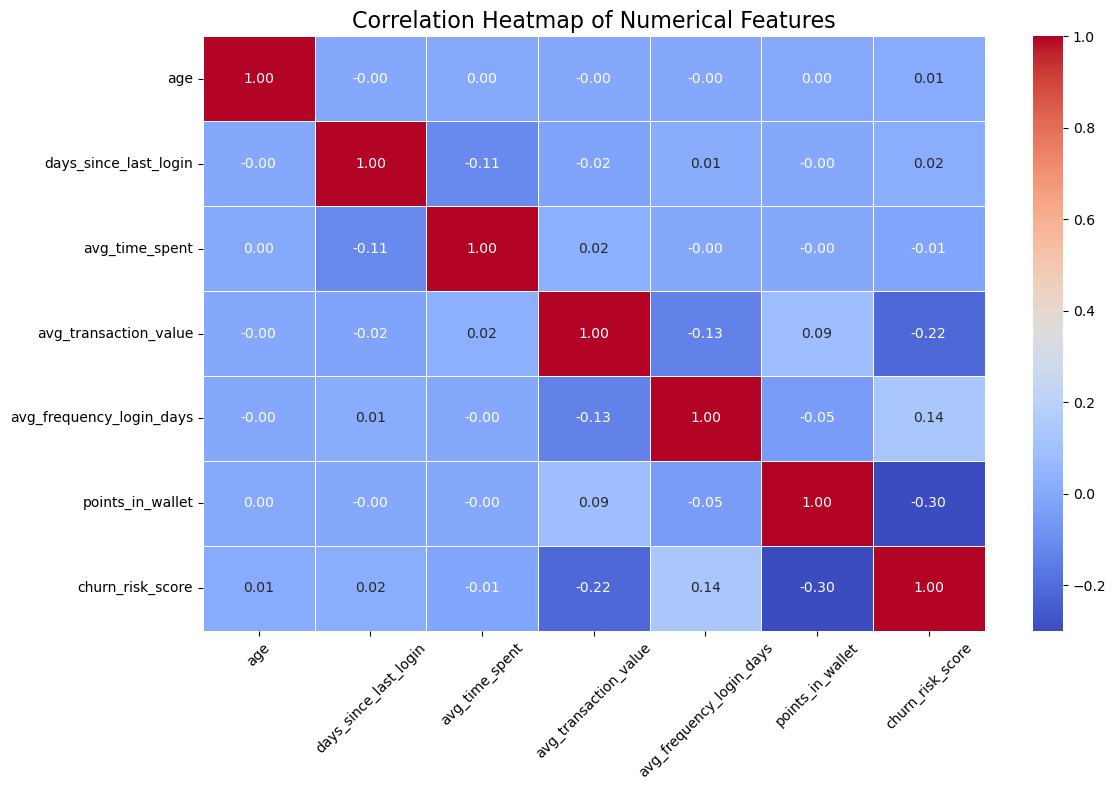

In [23]:
# correlation heatmap for numerical variables
# select only numeric columns
numeric_cols = df_clean.select_dtypes(include='number')

# compute correlation matrix
corr_matrix = numeric_cols.corr()

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# show correlation of all features with churn_risk_score
churn_corr = corr_matrix['churn_risk_score'].sort_values(ascending=False)
print("Correlation with churn_risk_score:\n")
print(churn_corr)

Correlation with churn_risk_score:

churn_risk_score            1.000000
avg_frequency_login_days    0.136550
days_since_last_login       0.016382
age                         0.006124
avg_time_spent             -0.012481
avg_transaction_value      -0.218012
points_in_wallet           -0.299567
Name: churn_risk_score, dtype: float64


### Distributions

1. Average churn score grouped by a category

In [21]:
df.groupby('gender')['churn_risk_score'].mean().sort_values(ascending=False)

gender
F          0.543483
M          0.538633
Unknown    0.491525
Name: churn_risk_score, dtype: float64

🔹 Average churn score by Region Category:

region_category
City       0.547146
Town       0.542044
Village    0.512024
Name: churn_risk_score, dtype: float64


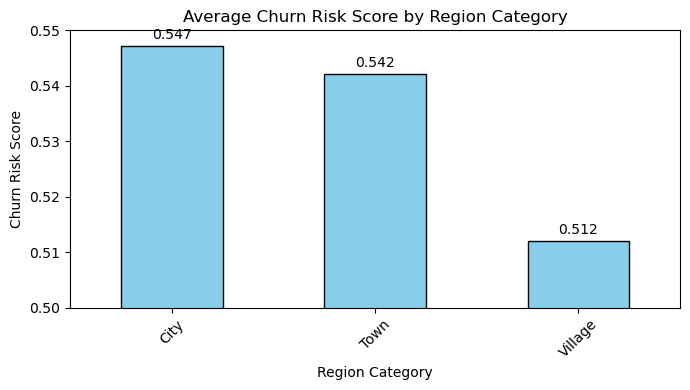

In [37]:
region_churn = df.groupby('region_category')['churn_risk_score'].mean().sort_values(ascending=False)
print("🔹 Average churn score by Region Category:\n")
print(region_churn)

ax = region_churn.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(7, 4))
plt.ylim(0.50, 0.55)
plt.title('Average Churn Risk Score by Region Category')
plt.ylabel('Churn Risk Score')
plt.xlabel('Region Category')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.3f', padding=3)
plt.tight_layout()
plt.show()

- **City** residents have the **highest churn risk (0.547)**, followed by **Town (0.542)**.
- **Village** users show the **lowest churn risk (0.512)**.

**Insight:**  
Urban users may have **higher expectations** or more **service alternatives**, increasing churn.  
Village users might be more **stable** or **less targeted by competitors**.


🔹 Average churn score by Membership Category:

membership_category
No Membership          0.970619
Basic Membership       0.967504
Silver Membership      0.427522
Gold Membership        0.369831
Platinum Membership    0.000000
Premium Membership     0.000000
Name: churn_risk_score, dtype: float64


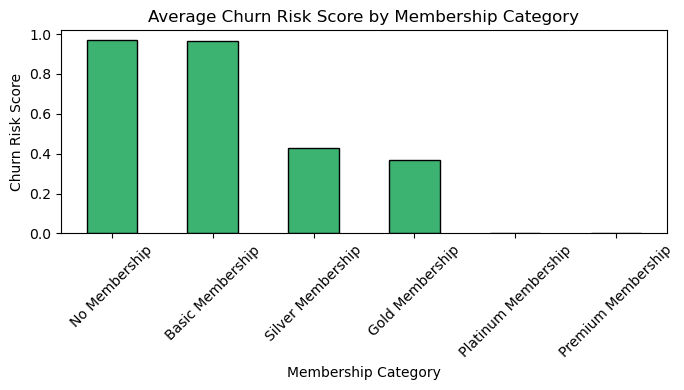

In [40]:
# Grouped averages
membership_churn = df.groupby('membership_category')['churn_risk_score'].mean().sort_values(ascending=False)
print("🔹 Average churn score by Membership Category:\n")
print(membership_churn)

# Bar plot
membership_churn.plot(kind='bar', color='mediumseagreen', edgecolor='black', figsize=(7, 4))
plt.title('Average Churn Risk Score by Membership Category')
plt.ylabel('Churn Risk Score')
plt.xlabel('Membership Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Churn is **extremely high** for **No Membership** and **Basic Membership** (~0.95).
- Churn drops significantly with **Silver (0.42)** and **Gold (0.36)** memberships.
- **Platinum and Premium** memberships show **no significant churn**.

**Insight:**  
Stronger membership tiers offer **protection against churn**.  
Encouraging users to **upgrade their membership** may reduce churn significantly.


🔹 Average churn score by Feedback:

feedback
Poor Product Quality        0.649921
Poor Customer Service       0.638516
No reason specified         0.634976
Poor Website                0.631797
Too many ads                0.627011
Products always in Stock    0.000000
Quality Customer Care       0.000000
Reasonable Price            0.000000
User Friendly Website       0.000000
Name: churn_risk_score, dtype: float64


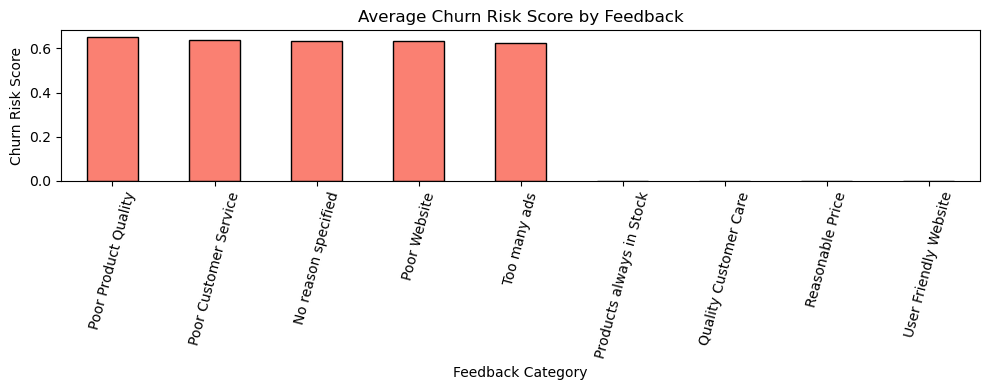

In [46]:
# Grouped averages
feedback_churn = df.groupby('feedback')['churn_risk_score'].mean().sort_values(ascending=False)
print("🔹 Average churn score by Feedback:\n")
print(feedback_churn)

# Bar plot
feedback_churn.plot(kind='bar', color='salmon', edgecolor='black', figsize=(10, 4))
plt.title('Average Churn Risk Score by Feedback')
plt.ylabel('Churn Risk Score')
plt.xlabel('Feedback Category')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


- Highest churn occurs with:
  - **Poor Product Quality**
  - **Poor Customer Service**
  - **Poor Website**
- Lowest churn seen for:
  - **User Friendly Website**
  - **Reasonable Price**
  - **Quality Customer Care**

**Insight:**  
Dissatisfaction with the product, service, or website experience is a major churn driver.  
Focus on **improving product quality, support, and UX** to reduce churn.


🔹 Average churn score by Internet Option:

internet_option
Fiber_Optic    0.544868
Mobile_Data    0.542413
Wi-Fi          0.535729
Name: churn_risk_score, dtype: float64


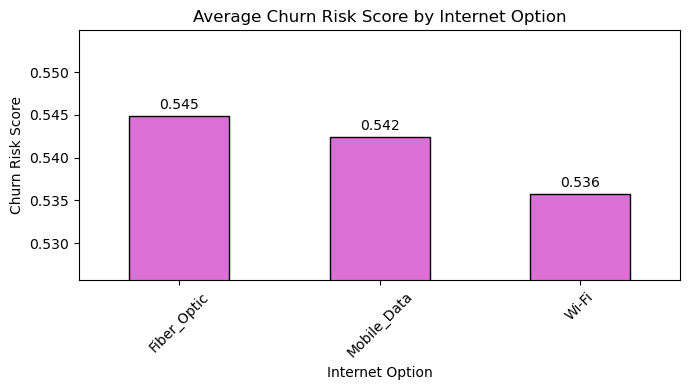

In [47]:
internet_churn = df.groupby('internet_option')['churn_risk_score'].mean().sort_values(ascending=False)
print("🔹 Average churn score by Internet Option:\n")
print(internet_churn)

ymin, ymax = internet_churn.min() - 0.01, internet_churn.max() + 0.01

ax = internet_churn.plot(kind='bar', color='orchid', edgecolor='black', figsize=(7, 4))
plt.ylim(ymin, ymax)
plt.title('Average Churn Risk Score by Internet Option')
plt.ylabel('Churn Risk Score')
plt.xlabel('Internet Option')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.3f', padding=3)
plt.tight_layout()
plt.show()

**Fiber Optic** (0.545) and **Mobile Data** (0.542) users show the **highest churn**.
**Wi-Fi** users show **lower churn (0.536)**.

**Insight:**  
Mobile and fiber users may be more **tech-savvy** and **likely to switch**.  
Consider offering **exclusive deals or loyalty perks** for these users.

🔹 Average churn score by Medium of Operation:

medium_of_operation
Smartphone    0.552248
?             0.547005
Desktop       0.533027
Both          0.520472
Name: churn_risk_score, dtype: float64


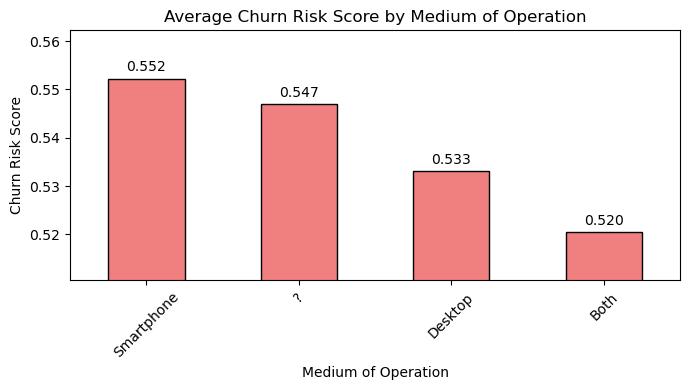

In [48]:
medium_churn = df.groupby('medium_of_operation')['churn_risk_score'].mean().sort_values(ascending=False)
print("🔹 Average churn score by Medium of Operation:\n")
print(medium_churn)

ymin, ymax = medium_churn.min() - 0.01, medium_churn.max() + 0.01

ax = medium_churn.plot(kind='bar', color='lightcoral', edgecolor='black', figsize=(7, 4))
plt.ylim(ymin, ymax)
plt.title('Average Churn Risk Score by Medium of Operation')
plt.ylabel('Churn Risk Score')
plt.xlabel('Medium of Operation')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.3f', padding=3)
plt.tight_layout()
plt.show()

**Smartphone-only** users have the **highest churn (0.552)**.
**Multi-platform** users (e.g., Desktop + Mobile) have the **lowest churn (0.520)**.

**Insight:**  
Customers using more than one platform are **more engaged**.  
Encourage multi-device usage to **increase stickiness** and reduce churn.

🔹 Average churn score by Use of Special Discount:

used_special_discount
No     0.546847
Yes    0.536181
Name: churn_risk_score, dtype: float64


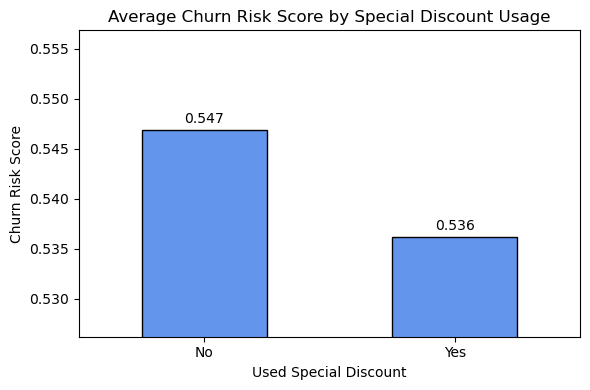

In [49]:
discount_churn = df.groupby('used_special_discount')['churn_risk_score'].mean().sort_values(ascending=False)
print("🔹 Average churn score by Use of Special Discount:\n")
print(discount_churn)

ymin, ymax = discount_churn.min() - 0.01, discount_churn.max() + 0.01

ax = discount_churn.plot(kind='bar', color='cornflowerblue', edgecolor='black', figsize=(6, 4))
plt.ylim(ymin, ymax)
plt.title('Average Churn Risk Score by Special Discount Usage')
plt.ylabel('Churn Risk Score')
plt.xlabel('Used Special Discount')
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], fmt='%.3f', padding=3)
plt.tight_layout()
plt.show()

Users who **did not use discounts** have **higher churn (0.547)**.
Users who **used special discounts** show **lower churn (0.536)**.

**Insight:**  
Discounts seem to **engage users** and reduce churn.  
Offer **targeted or personalized discounts** to keep high-risk users onboard.

In [50]:
for col in categorical_cols:
    print(f"\nAverage churn score by {col}:\n")
    print(df_clean.groupby(col)['churn_risk_score'].mean().sort_values(ascending=False))

NameError: name 'categorical_cols' is not defined

### Descriptive Statistics

### Feature Engineering
Can we create any new features/attributes using the variables we already have?

In [ ]:
df_clean.head(10)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,698.25,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,NaT,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,NaT,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1
5,13,M,PSG1LGF,City,Gold Membership,NaT,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,6:46:07,23.0,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,0
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10.0,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0
7,42,M,4UJ1551,Town,No Membership,NaT,Yes,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19.0,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15.0,191.07,18362.31,20.0,698.25,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,19:10:16,10.0,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1


In [ ]:
# create binary variable for complaint status
df_clean['had_complaint'] = df_clean['complaint_status'].apply(lambda x: 0 if x == 'Not Applicable' else 1)

In [ ]:
# create engagement score based on behavioral features (avg_time_spent, avg_frequency_login_days, points_in_wallet)
df_clean['engagement_score'] = (
    df_clean['avg_time_spent'] * df_clean['avg_frequency_login_days']
) + df_clean['points_in_wallet']

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,engagement_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,5892.46
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,698.25,Yes,No,Yes,Solved,Quality Customer Care,0,3761.65
2,44,F,1F2TCL3,Town,No Membership,NaT,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,11856.21
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1,887.28
4,31,F,SVZXCWB,City,No Membership,NaT,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1,2473.14
5,13,M,PSG1LGF,City,Gold Membership,NaT,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,6:46:07,23.0,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,0,11129.15
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10.0,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0,2306.85
7,42,M,4UJ1551,Town,No Membership,NaT,Yes,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19.0,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1,10866.72
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15.0,191.07,18362.31,20.0,698.25,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0,4519.65
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,19:10:16,10.0,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1,3430.91


In [ ]:
# check values for membership category
membership_categories = df_clean['membership_category'].unique()
print(membership_categories)

# group similar membership values (e.g none, basic, paid)
df_clean['membership_grouped'] = df_clean['membership_category'].replace({
    'No Membership': 'None',
    'Basic Membership': 'Basic',
    'Silver Membership': 'Paid',
    'Gold Membership': 'Paid',
    'Premium Membership': 'Paid',
    'Platinum Membership': 'Paid'
})


['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


In [ ]:
# check for changes
df_clean.head(10)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,engagement_score,membership_grouped,had_complaint
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,16:08:02,17.0,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0,5892.46,Paid,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16.0,306.34,12838.38,10.0,698.25,Yes,No,Yes,Solved,Quality Customer Care,0,3761.65,Paid,1
2,44,F,1F2TCL3,Town,No Membership,NaT,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14.0,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1,11856.21,None,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11.0,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1,887.28,None,1
4,31,F,SVZXCWB,City,No Membership,NaT,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20.0,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1,2473.14,None,1
5,13,M,PSG1LGF,City,Gold Membership,NaT,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,6:46:07,23.0,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,0,11129.15,Paid,1
6,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10.0,55.38,8982.50,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,0,2306.85,Paid,1
7,42,M,4UJ1551,Town,No Membership,NaT,Yes,CID56614,Credit/Debit Card Offers,Both,Fiber_Optic,7:52:43,19.0,429.11,44554.82,24.0,568.08,No,Yes,Yes,Unsolved,Poor Product Quality,1,10866.72,None,1
8,44,M,0481QNQ,Village,Silver Membership,2016-12-14,No,xxxxxxxx,Without Offers,Smartphone,Fiber_Optic,6:50:10,15.0,191.07,18362.31,20.0,698.25,Yes,No,Yes,Solved in Follow-up,Poor Customer Service,0,4519.65,Paid,1
9,45,F,ZHP4MCR,Town,No Membership,2016-11-30,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,19:10:16,10.0,97.31,19244.16,28.0,706.23,No,Yes,Yes,No Information Available,Poor Customer Service,1,3430.91,None,1


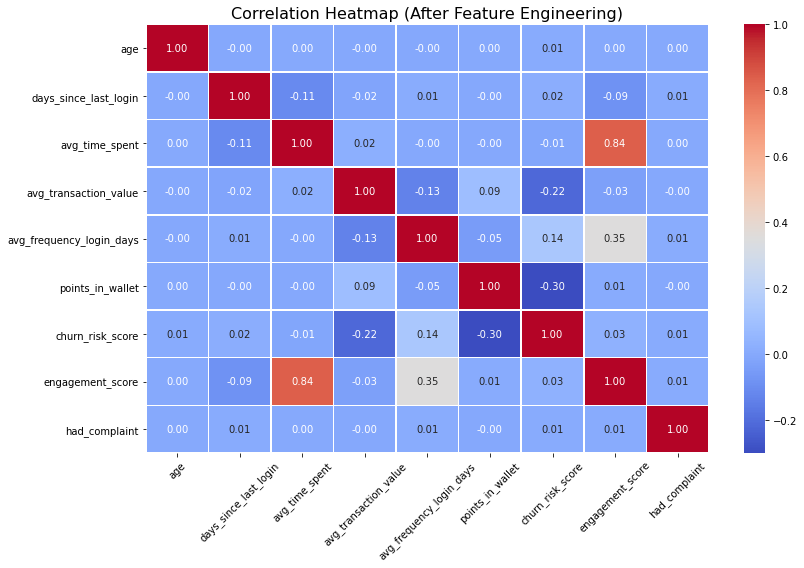

In [ ]:
# another correlation heatmap for after feature engineering
# select only numeric columns (including new engineered ones)
numeric_cols = df_clean.select_dtypes(include='number')

# compute correlation matrix
corr_matrix2 = numeric_cols.corr()

# plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (After Feature Engineering)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
churn_corr2 = corr_matrix2['churn_risk_score'].sort_values(ascending=False)
print("Correlation with churn_risk_score:\n")
print(churn_corr2)

Correlation with churn_risk_score:

churn_risk_score            1.000000
avg_frequency_login_days    0.136550
engagement_score            0.033015
days_since_last_login       0.016382
had_complaint               0.008934
age                         0.006124
avg_time_spent             -0.012481
avg_transaction_value      -0.218012
points_in_wallet           -0.299567
Name: churn_risk_score, dtype: float64


## Model Preparation
For methodologies/ML Algos
- create binary values and either HotEncode or OneHotEncode for Naive bayes
- also encode churn_risk_score